In [ ]:
#| default_exp initializers

# Initializers

> For that moment when built in initializers don't satisfy your needs.

In [ ]:
#| export
from jax import random, numpy as jnp
from jax._src import dtypes

I found it weird that the `flax` library didn't provide a "bounded" uniform initializer, so I took the code for the `uniform` one and modified it in a way that it allowed setting the bounds of the desired uniform initialization.

In [ ]:
#| export
def bounded_uniform(minval=0.0,
                    maxval=1.0,
                    dtype=dtypes.float_,
                    ):
  def init(key,
           shape,
           dtype=dtype):
    dtype = dtypes.canonicalize_dtype(dtype)
    return random.uniform(key, shape, dtype, minval, maxval)
  return init

In [ ]:
#| hide
#| eval: false
from jax import numpy as jnp
from flax import linen as nn
import matplotlib.pyplot as plt

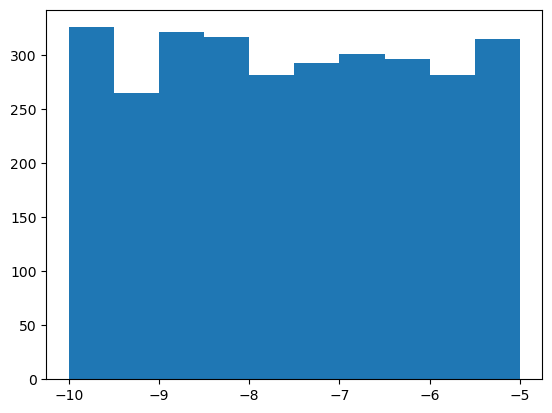

In [ ]:
#| eval: false
layer = nn.Dense(features=1000, kernel_init=bounded_uniform(minval=-10., maxval=-5.))
params = layer.init(random.PRNGKey(0), jnp.ones(shape=(1,32,32,3)))
plt.hist(params["params"]["kernel"].ravel())
plt.show()

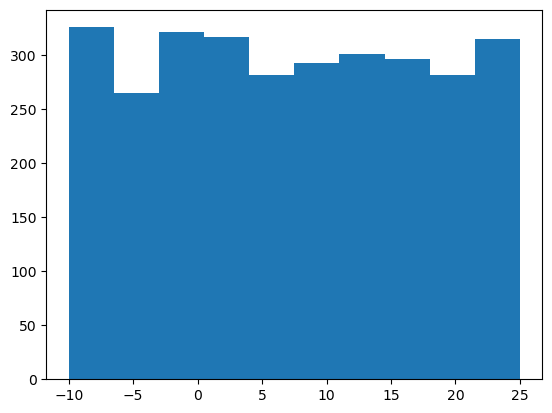

In [ ]:
#| eval: false
layer = nn.Dense(features=1000, kernel_init=bounded_uniform(minval=-10., maxval=25.))
params = layer.init(random.PRNGKey(0), jnp.ones(shape=(1,32,32,3)))
plt.hist(params["params"]["kernel"].ravel())
plt.show()

In [ ]:
#| export
def displaced_normal(mean=0., # Mean of the distribution.
                     stddev=1e-2, # Standard deviation of the distribution.
                     dtype=dtypes.float_ # Desired DType of the resulting array.
                     ):
  """Builds an initializer that returns real normally-distributed random arrays."""

  def init(key,
           shape,
           dtype=dtype):
    dtype = dtypes.canonicalize_dtype(dtype)
    return mean + random.normal(key, shape, dtype) * stddev
  return init

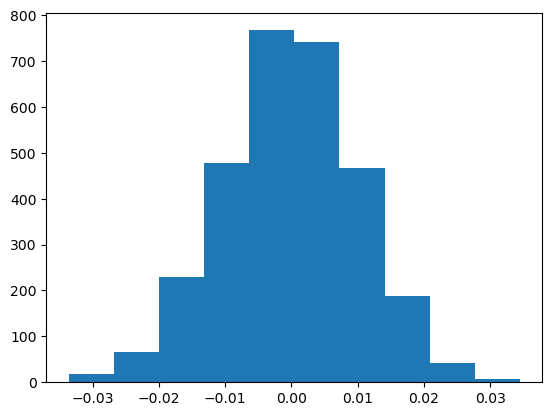

In [ ]:
#| eval: false
layer = nn.Dense(features=1000, kernel_init=displaced_normal())
params = layer.init(random.PRNGKey(0), jnp.ones(shape=(1,32,32,3)))
plt.hist(params["params"]["kernel"].ravel())
plt.show()

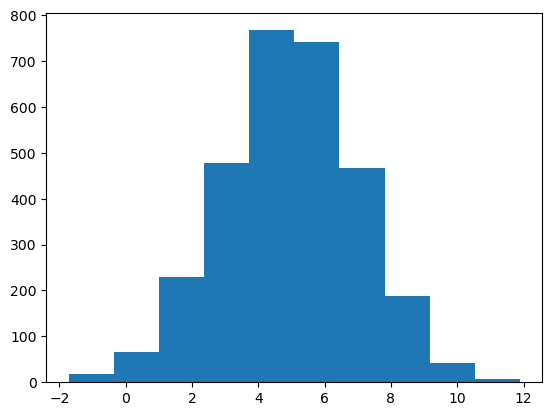

In [ ]:
#| eval: false
layer = nn.Dense(features=1000, kernel_init=displaced_normal(mean=5., stddev=2.))
params = layer.init(random.PRNGKey(0), jnp.ones(shape=(1,32,32,3)))
plt.hist(params["params"]["kernel"].ravel())
plt.show()

In [ ]:
#| export
def freq_scales_init(n_scales, # Number of scales.
                     fs, # Sampling frequency.
                     dtype=dtypes.float_ # Desired DType of the resulting array.
                     ):
  """"""

  def init(key,
           shape,
           dtype=dtype):
    dtype = dtypes.canonicalize_dtype(dtype)
    e = jnp.arange(start=1, stop=n_scales+1)
    fM = fs/(2**e)
    return fM - (fM-fM/2)/2
  return init

In [ ]:
layer = nn.Dense(features=4, kernel_init=freq_scales_init(n_scales=4, fs=64))
params = layer.init(random.PRNGKey(0), jnp.ones(shape=(1,4)))
params

FrozenDict({
    params: {
        kernel: Array([24., 12.,  6.,  3.], dtype=float32),
        bias: Array([0., 0., 0., 0.], dtype=float32),
    },
})

In [ ]:
#| export
def k_array(k, # Number of scales.
            arr, # Sampling frequency.
            dtype=dtypes.float_ # Desired DType of the resulting array.
            ):
  """"""

  def init(key,
           shape,
           dtype=dtype):
    dtype = dtypes.canonicalize_dtype(dtype)
    return k/arr
  return init

In [ ]:
layer = nn.Dense(features=4, kernel_init=k_array(k=2, arr=jnp.array([24., 12., 6., 3.])))
params = layer.init(random.PRNGKey(0), jnp.ones(shape=(1,4)))
params

FrozenDict({
    params: {
        kernel: Array([0.08333334, 0.16666667, 0.33333334, 0.6666667 ], dtype=float32),
        bias: Array([0., 0., 0., 0.], dtype=float32),
    },
})

In [ ]:
#| export
def linspace(start,
             stop,
             num,
             dtype=dtypes.float_ # Desired DType of the resulting array.
             ):
  """"""

  def init(key,
           shape,
           dtype=dtype):
    dtype = dtypes.canonicalize_dtype(dtype)
    return jnp.linspace(start=start, stop=stop, num=num+1, dtype=dtype)[:-1]
  return init

In [ ]:
layer = nn.Dense(features=4, kernel_init=linspace(start=0, stop=jnp.pi, num=4))
params = layer.init(random.PRNGKey(0), jnp.ones(shape=(1,4)))
params

FrozenDict({
    params: {
        kernel: Array([0.       , 0.7853982, 1.5707964, 2.3561945], dtype=float32),
        bias: Array([0., 0., 0., 0.], dtype=float32),
    },
})

In [ ]:
#| export
def equal_to(arr,
             dtype=dtypes.float_ # Desired DType of the resulting array.
             ):
  """"""

  def init(key,
           shape,
           dtype=dtype):
    dtype = dtypes.canonicalize_dtype(dtype)
    return jnp.array(arr, dtype=dtype)
  return init

In [ ]:
#| eval: false
layer = nn.Dense(features=4, kernel_init=equal_to([1., 2., 3., 4.]))
params = layer.init(random.PRNGKey(0), jnp.ones(shape=(1,4)))
params

FrozenDict({
    params: {
        kernel: Array([1., 2., 3., 4.], dtype=float32),
        bias: Array([0., 0., 0., 0.], dtype=float32),
    },
})

In [ ]:
#| export
def mean(dtype=dtypes.float_ # Desired DType of the resulting array.
              ):
  """Builds an initializer that returns a kernel that calculates the mean of the interacting pixels."""

  def init(key,
           shape,
           dtype=dtype):
    dtype = dtypes.canonicalize_dtype(dtype)
    return jnp.ones(shape, dtype)/jnp.prod(jnp.array(shape))
  return init

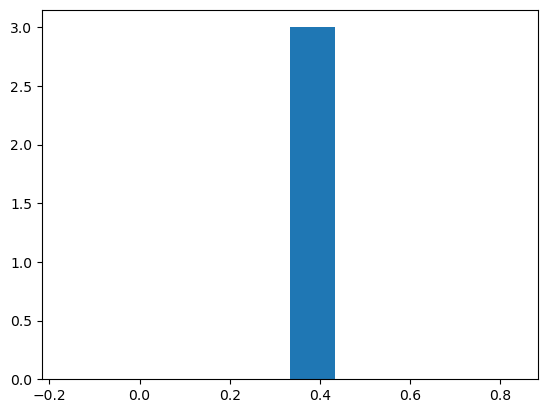

In [ ]:
#| eval: false
layer = nn.Conv(features=1, kernel_size=(1,1), kernel_init=mean())
params = layer.init(random.PRNGKey(0), jnp.ones(shape=(1,32,32,3)))
plt.hist(params["params"]["kernel"].ravel())
plt.show()